# Evaluating Nightshade

## Imports

In [6]:
import torch
from eval_nightshade import NightshadeEvaluator
from nightshade import Nightshade
from perturbation_methods import fgsm_penalty, pgd_penalty, nightshade_penalty
from data_process import get_dataset, get_poisoning_candidates
from PIL import Image
import gc
import glob
import pickle
import numpy as np

%load_ext autoreload
%autoreload 2
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Part 1

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
evaluator = NightshadeEvaluator(device=device)

methods = {
    'fgsm': fgsm_penalty,
    'pgd': pgd_penalty,
    'original': nightshade_penalty
}

results = {}
poisoned_imgs = {}
for name, method in methods.items():
    nightshade = Nightshade(target_concept=None, device=device, penalty_method=method)
    original_img = Image.open('test_images/dog.jpg')
    poisoned_img = nightshade.generate(original_img, target_concept='cat')
    poisoned_imgs[name] = poisoned_img

    results[name] = {
        'visual_metrics': evaluator.evaluate_perturbation(original_img, poisoned_img),
        'embedding_metrics': evaluator.evaluate_embedding_shift(original_img, poisoned_img, 'cat')
    }

    del nightshade
    gc.collect()
    torch.cuda.empty_cache()



/home/zabibeau/Spring2025/MachineLearning/nightshade-ml/nightshade_env/lib/python3.10/site-packages/diffusers/pipelines/pipeline_loading_utils.py:285: FutureWarning: You are loading the variant fp16 from stabilityai/stable-diffusion-2-1 via `revision='fp16'`. This behavior is deprecated and will be removed in diffusers v1. One should use `variant='fp16'` instead. However, it appears that stabilityai/stable-diffusion-2-1 currently does not have the required variant filenames in the 'main' branch. 
 The Diffusers team and community would be very grateful if you could open an issue: https://github.com/huggingface/diffusers/issues/new with the title 'stabilityai/stable-diffusion-2-1 is missing fp16 files' so that the correct variant file can be added.
  warnings.warn(


Loading pipeline components...:   0%|          | 0/5 [00:00<?, ?it/s]

An error occurred while trying to fetch /home/zabibeau/.cache/huggingface/hub/models--stabilityai--stable-diffusion-2-1/snapshots/f7f33030acc57428be85fbec092c37a78231d75a/vae: Error no file named diffusion_pytorch_model.safetensors found in directory /home/zabibeau/.cache/huggingface/hub/models--stabilityai--stable-diffusion-2-1/snapshots/f7f33030acc57428be85fbec092c37a78231d75a/vae.
Defaulting to unsafe serialization. Pass `allow_pickle=False` to raise an error instead.
An error occurred while trying to fetch /home/zabibeau/.cache/huggingface/hub/models--stabilityai--stable-diffusion-2-1/snapshots/f7f33030acc57428be85fbec092c37a78231d75a/unet: Error no file named diffusion_pytorch_model.safetensors found in directory /home/zabibeau/.cache/huggingface/hub/models--stabilityai--stable-diffusion-2-1/snapshots/f7f33030acc57428be85fbec092c37a78231d75a/unet.
Defaulting to unsafe serialization. Pass `allow_pickle=False` to raise an error instead.


  0%|          | 0/50 [00:00<?, ?it/s]

Loading pipeline components...:   0%|          | 0/5 [00:00<?, ?it/s]

An error occurred while trying to fetch /home/zabibeau/.cache/huggingface/hub/models--stabilityai--stable-diffusion-2-1/snapshots/f7f33030acc57428be85fbec092c37a78231d75a/vae: Error no file named diffusion_pytorch_model.safetensors found in directory /home/zabibeau/.cache/huggingface/hub/models--stabilityai--stable-diffusion-2-1/snapshots/f7f33030acc57428be85fbec092c37a78231d75a/vae.
Defaulting to unsafe serialization. Pass `allow_pickle=False` to raise an error instead.
An error occurred while trying to fetch /home/zabibeau/.cache/huggingface/hub/models--stabilityai--stable-diffusion-2-1/snapshots/f7f33030acc57428be85fbec092c37a78231d75a/unet: Error no file named diffusion_pytorch_model.safetensors found in directory /home/zabibeau/.cache/huggingface/hub/models--stabilityai--stable-diffusion-2-1/snapshots/f7f33030acc57428be85fbec092c37a78231d75a/unet.
Defaulting to unsafe serialization. Pass `allow_pickle=False` to raise an error instead.


  0%|          | 0/50 [00:00<?, ?it/s]

Loading pipeline components...:   0%|          | 0/5 [00:00<?, ?it/s]

An error occurred while trying to fetch /home/zabibeau/.cache/huggingface/hub/models--stabilityai--stable-diffusion-2-1/snapshots/f7f33030acc57428be85fbec092c37a78231d75a/vae: Error no file named diffusion_pytorch_model.safetensors found in directory /home/zabibeau/.cache/huggingface/hub/models--stabilityai--stable-diffusion-2-1/snapshots/f7f33030acc57428be85fbec092c37a78231d75a/vae.
Defaulting to unsafe serialization. Pass `allow_pickle=False` to raise an error instead.
An error occurred while trying to fetch /home/zabibeau/.cache/huggingface/hub/models--stabilityai--stable-diffusion-2-1/snapshots/f7f33030acc57428be85fbec092c37a78231d75a/unet: Error no file named diffusion_pytorch_model.safetensors found in directory /home/zabibeau/.cache/huggingface/hub/models--stabilityai--stable-diffusion-2-1/snapshots/f7f33030acc57428be85fbec092c37a78231d75a/unet.
Defaulting to unsafe serialization. Pass `allow_pickle=False` to raise an error instead.


  0%|          | 0/50 [00:00<?, ?it/s]

Iteration 0	Loss: 843.000
Iteration 10	Loss: 652.500
Iteration 20	Loss: 604.500
Iteration 30	Loss: 550.000
Iteration 40	Loss: 488.750


Results for fgsm:
Visual Metrics: {'l2_norm': 86.92882537841797, 'linf_norm': 0.10196083784103394, 'ssim': 0.23967257142066956, 'lpips': 0.6280943155288696}
Embedding Metrics: {'original_target_sim': 0.21435546875, 'perturbed_target_sim': 0.2158203125, 'embedding_shift': 3.587890625}



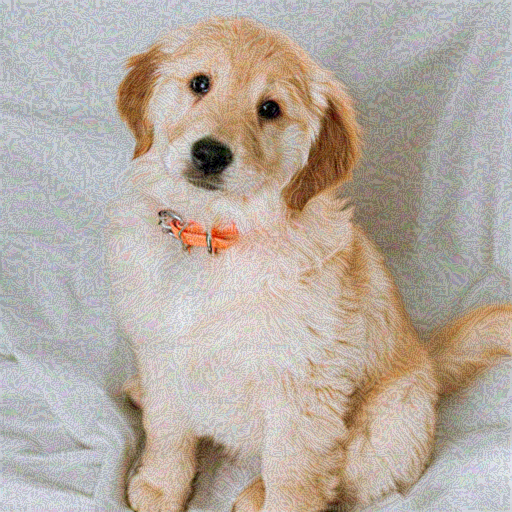

Results for pgd:
Visual Metrics: {'l2_norm': 33.99540328979492, 'linf_norm': 0.10196083784103394, 'ssim': 0.6853457689285278, 'lpips': 0.27091604471206665}
Embedding Metrics: {'original_target_sim': 0.21435546875, 'perturbed_target_sim': 0.21142578125, 'embedding_shift': 3.857421875}



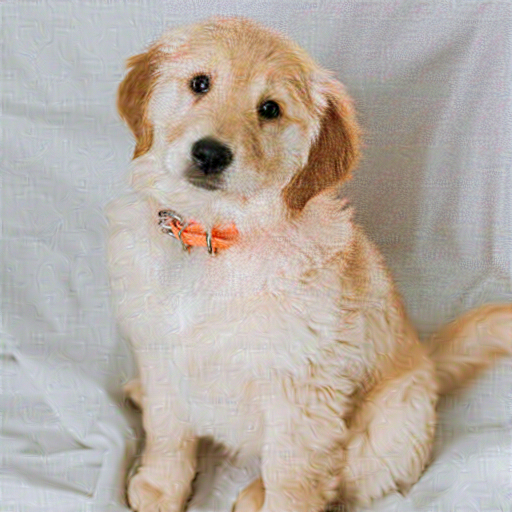

Results for original:
Visual Metrics: {'l2_norm': 128.7337188720703, 'linf_norm': 0.2039216160774231, 'ssim': 0.17947372794151306, 'lpips': 0.6868079304695129}
Embedding Metrics: {'original_target_sim': 0.21435546875, 'perturbed_target_sim': 0.2318115234375, 'embedding_shift': 5.57421875}



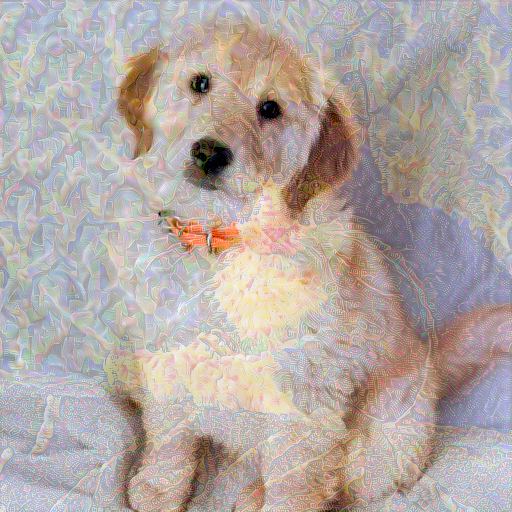

In [4]:
for name, result in results.items():
    print(f"Results for {name}:")
    print(f"Visual Metrics: {result['visual_metrics']}")
    print(f"Embedding Metrics: {result['embedding_metrics']}")
    print()
    # Display the poisoned image
    display(poisoned_imgs[name])

## Part 2

In [ ]:
# get a list of poisoning candidates
clean_dataset = get_dataset('annotations/captions_train2014.json', 'train2014', 10000)
poisoning_candidates = get_poisoning_candidates(clean_dataset, 'dog', 100)

Loaded 5000 unique image entries


Processing images:   0%|          | 0/5000 [00:00<?, ?it/s]

Exception: Not enough candidates for dog, found 77, required 100

In [ ]:
candidate_files = glob.glob("poisoning_candidates/dog_*.p")
candidates = [pickle.load(open(f, 'rb')) for f in candidate_files]

for name, method in methods.items():
    output_dir = f'poisoned_images/{name}'
    nightshade = Nightshade(target_concept=None, device=device, penalty_method=method)
    for candidate in candidates:
        original_img = Image.fromarray(candidate['img'])
        poisoned_img = nightshade.generate(original_img, target_concept='cat')
        poisoned_data = {
            'img': np.array(poisoned_img),
            'text': candidate['text']
        }
        pickle.dump(poisoned_data, open(f"{output_dir}/{name}_{candidate['id']}.p", 'wb'))
    print(f'Saved {len(candidates)} poisoned images for {name} method in {output_dir}')
    del nightshade
    gc.collect()
    torch.cuda.empty_cache()


/home/zabibeau/Spring2025/MachineLearning/nightshade-ml/nightshade_env/lib/python3.10/site-packages/diffusers/pipelines/pipeline_loading_utils.py:285: FutureWarning: You are loading the variant fp16 from stabilityai/stable-diffusion-2-1 via `revision='fp16'`. This behavior is deprecated and will be removed in diffusers v1. One should use `variant='fp16'` instead. However, it appears that stabilityai/stable-diffusion-2-1 currently does not have the required variant filenames in the 'main' branch. 
 The Diffusers team and community would be very grateful if you could open an issue: https://github.com/huggingface/diffusers/issues/new with the title 'stabilityai/stable-diffusion-2-1 is missing fp16 files' so that the correct variant file can be added.
  warnings.warn(


Loading pipeline components...:   0%|          | 0/5 [00:00<?, ?it/s]

An error occurred while trying to fetch /home/zabibeau/.cache/huggingface/hub/models--stabilityai--stable-diffusion-2-1/snapshots/f7f33030acc57428be85fbec092c37a78231d75a/vae: Error no file named diffusion_pytorch_model.safetensors found in directory /home/zabibeau/.cache/huggingface/hub/models--stabilityai--stable-diffusion-2-1/snapshots/f7f33030acc57428be85fbec092c37a78231d75a/vae.
Defaulting to unsafe serialization. Pass `allow_pickle=False` to raise an error instead.
An error occurred while trying to fetch /home/zabibeau/.cache/huggingface/hub/models--stabilityai--stable-diffusion-2-1/snapshots/f7f33030acc57428be85fbec092c37a78231d75a/unet: Error no file named diffusion_pytorch_model.safetensors found in directory /home/zabibeau/.cache/huggingface/hub/models--stabilityai--stable-diffusion-2-1/snapshots/f7f33030acc57428be85fbec092c37a78231d75a/unet.
Defaulting to unsafe serialization. Pass `allow_pickle=False` to raise an error instead.


Saved 0 poisoned images for fgsm method in poisoned_images/fgsm


Loading pipeline components...:   0%|          | 0/5 [00:00<?, ?it/s]

An error occurred while trying to fetch /home/zabibeau/.cache/huggingface/hub/models--stabilityai--stable-diffusion-2-1/snapshots/f7f33030acc57428be85fbec092c37a78231d75a/vae: Error no file named diffusion_pytorch_model.safetensors found in directory /home/zabibeau/.cache/huggingface/hub/models--stabilityai--stable-diffusion-2-1/snapshots/f7f33030acc57428be85fbec092c37a78231d75a/vae.
Defaulting to unsafe serialization. Pass `allow_pickle=False` to raise an error instead.
An error occurred while trying to fetch /home/zabibeau/.cache/huggingface/hub/models--stabilityai--stable-diffusion-2-1/snapshots/f7f33030acc57428be85fbec092c37a78231d75a/unet: Error no file named diffusion_pytorch_model.safetensors found in directory /home/zabibeau/.cache/huggingface/hub/models--stabilityai--stable-diffusion-2-1/snapshots/f7f33030acc57428be85fbec092c37a78231d75a/unet.
Defaulting to unsafe serialization. Pass `allow_pickle=False` to raise an error instead.


Saved 0 poisoned images for pgd method in poisoned_images/pgd


Loading pipeline components...:   0%|          | 0/5 [00:00<?, ?it/s]

An error occurred while trying to fetch /home/zabibeau/.cache/huggingface/hub/models--stabilityai--stable-diffusion-2-1/snapshots/f7f33030acc57428be85fbec092c37a78231d75a/vae: Error no file named diffusion_pytorch_model.safetensors found in directory /home/zabibeau/.cache/huggingface/hub/models--stabilityai--stable-diffusion-2-1/snapshots/f7f33030acc57428be85fbec092c37a78231d75a/vae.
Defaulting to unsafe serialization. Pass `allow_pickle=False` to raise an error instead.
An error occurred while trying to fetch /home/zabibeau/.cache/huggingface/hub/models--stabilityai--stable-diffusion-2-1/snapshots/f7f33030acc57428be85fbec092c37a78231d75a/unet: Error no file named diffusion_pytorch_model.safetensors found in directory /home/zabibeau/.cache/huggingface/hub/models--stabilityai--stable-diffusion-2-1/snapshots/f7f33030acc57428be85fbec092c37a78231d75a/unet.
Defaulting to unsafe serialization. Pass `allow_pickle=False` to raise an error instead.


Saved 0 poisoned images for original method in poisoned_images/original
